<a href="https://colab.research.google.com/github/panicoro/CatanSettlers/blob/master/1_1_An%C3%A1lisis_exploratorio_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciencia de Datos e Inteligencia Artificial para la industria del software**

## **Edición 2024**

---
## 1.1. Análisis Exploratorio de Datos


* Preprocesamiento y preparación de datos numéricos.
  * Codificación.
  * Estandarización y normalización
  * Detección y remoción de outliers
  * Duplicados
* Correlaciones espurias
* Dataset shift

---
#Preprocesamiento y preparación de datos numéricos.
---

**Es muy raro que los datos de los que disponemos estén ya listos para ser usados**.

Lo más común es que los datos necesiten ser transformados previamente. Además, incluso antes de estas transformaciones es posible que los datos tengan que ser modificados y corregidos, porque el ingreso manual de datos por parte de seres humanos suele estar acompañado de errores. Una forma de resolver esto es estandarizar lo más posible la clase de datos que el operador puede ingresar, pero aún así es difícil que no haya datos que requieran ser corregidos.

El preprocesamiento y la preparación de datos numéricos son pasos esenciales en el análisis de datos y la construcción de modelos predictivos. Incluso si no lo sabías, es posible que hayamos realizado algunas técnicas de preprocesamiento sin darnos cuenta.

Cuando trabajamos con datos numéricos, es común encontrarnos con desafíos, como valores faltantes, outliers, variables en diferentes escalas, incluso con variables que no son numéricas. El preprocesamiento y la preparación de datos nos permiten abordar estos desafíos para asegurar la calidad y la integridad de los datos antes de su análisis o modelado.

Para explicar estos temas, utilicemos el dataset  `certificados-personas-por-fecha-ingreso-provincia-localidad.csv` que se puede descargar desde este [link](https://www.datos.gob.ar/dataset/turismo-certificado-unico-habilitante-para-circulacion-cuhc---verano/archivo/turismo_176dc4bc-7597-4e9b-850d-0d27bcbca8d0).

Además usaremos la clase `preprocessing` de **scikit-learn**.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
pathCurso = '/content/drive/MyDrive/CCDAA/Data/'

In [ ]:
# Importar bibliotecas
import pandas as pd

ruta_archivo = pathCurso + 'certificados-personas-por-fecha-ingreso-provincia-localidad.csv'

In [ ]:
datos = pd.read_csv(ruta_archivo)
datos.head(5)

In [ ]:
datos["destino_localidad"].value_counts()

In [ ]:
datos.describe()

In [ ]:
datos.info()

## Codificación de variables categóricas

Las variables categóricas deben ser codificadas en formato numérico antes de ser utilizadas en modelos de aprendizaje automático. Algunas técnicas comunes de codificación incluyen:

* Label/Ordinal Encoder: Asigna un valor numérico a cada categoría de manera arbitraria o en función de su orden o jerarquía.
* Codificación one-hot: Crea una nueva columna binaria para cada categoría y asigna 1 a la categoría presente y 0 a las demás.


### Label Encoder

La codificación de etiquetas es una técnica utilizada para transformar targets categóricos en valores numéricos. Esta técnica asigna un valor numérico único a cada categoría presente en la variable. Es especialmente útil cuando se requiere una representación numérica para el análisis o el modelado.

Algunas características clave de la codificación de etiquetas son:

1. Transformación de variables categóricas (texto a número entero): La codificación de etiquetas permite convertir variables categóricas en formato de texto en valores numéricos. Esto es útil cuando se trabaja con algoritmos o modelos que solo aceptan datos numéricos.

2. Asignación de valores numéricos únicos: Cada categoría única en la variable categórica se le asigna un valor numérico único.

En Python, se puede utilizar el módulo `LabelEncoder` de la biblioteca `sklearn.preprocessing` para realizar la codificación de etiquetas. Este módulo proporciona una interfaz sencilla para ajustar y transformar targets categóricos en valores numéricos.

In [ ]:
datos["destino_provincia"]#.nunique()

In [ ]:
datos_labelencoder = datos.copy()

from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
encoder = LabelEncoder()

# Ajustar y transformar los datos
y = datos_labelencoder['destino_provincia']
datos_labelencoder['destino_provincia_codificada'] = encoder.fit(y).transform(y)
# datos_labelencoder['destino_provincia_codificada'] = encoder.fit_transform(y)

# Imprimir las categorías codificadas
datos_labelencoder[['destino_provincia', 'destino_provincia_codificada']]

In [ ]:
# Obtener las categorías codificadas
categorias_codificadas = encoder.classes_

# Crear un diccionario para almacenar la correspondencia
correspondencia = {}

# Asignar la correspondencia entre las categorías y los números
for i, categoria in enumerate(categorias_codificadas):
    correspondencia[categoria] = i

# Imprimir la correspondencia
print(correspondencia)

### Ordinal Encoder

Para codificar variables categóricas de entrada se utiliza la _codificación ordinal_, asignando también un valor numérico a cada categoría en función de su orden o jerarquía natural.

En Python, se puede utilizar la clase `OrdinalEncoder` de la biblioteca `sklearn.preprocessing` para realizar la codificación ordinal. Veamos un ejemplo de cómo utilizar OrdinalEncoder:

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Datos de ejemplo
datos1 = pd.DataFrame({'Tamaño': ['Pequeño', 'Mediano', 'Grande', 'Mediano', 'Pequeño']})

# Crear una instancia de OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Pequeño', 'Mediano', 'Grande']])

# Ajustar y transformar los datos
datos_encoded = encoder.fit_transform(datos1[['Tamaño']])

datos_encoded

In [ ]:
# Agregar la columna codificada al DataFrame original
datos1['Tamaño_codificado'] = datos_encoded.astype(int)

#datos['Tamaño_codificado'] = datos_encoded.astype(int) + 1

# Imprimir los datos originales y los codificados
print(datos1)

In [ ]:
datos_ordinalencoder = datos.copy()

from sklearn.preprocessing import OrdinalEncoder

# Crear una instancia de OrdinalEncoder
encoder = OrdinalEncoder(categories=[['La Rioja', 'Tucumán','Mendoza', 'Misiones', 'Rio Negro','Buenos Aires', 'Neuquén', 'San Juan', 'Santa Fe', 'Tierra Del Fuego', 'Chubut', 'Salta', 'Catamarca', 'Entre Rios', 'San Luis', 'Cordoba', 'Jujuy']])

# Ajustar y transformar los datos
datos_ordinalencoder['destino_provincia_codificada'] = encoder.fit_transform(datos_ordinalencoder[['destino_provincia']]).astype(int)

# Imprimir las categorías codificadas
datos_ordinalencoder

Algunas características clave de la codificación ordinal son:

1. Asignación de valores numéricos: Cada categoría única en la variable categórica se le asigna un valor numérico único en función de su orden o jerarquía. Los valores numéricos se asignan de manera secuencial, comenzando desde 0, hasta el número total de categorías menos 1.

2. Preservación del orden: La codificación ordinal conserva la información de orden o jerarquía entre las categorías. Esto significa que las categorías con valores numéricos más altos representan un mayor orden o jerarquía en comparación con las categorías con valores numéricos más bajos.

3. Aplicación en variables categóricas ordenadas: La codificación ordinal es especialmente útil cuando se trabaja con variables categóricas que tienen un orden lógico predefinido, como niveles de educación (primaria, secundaria, universitaria), clasificaciones (bajo, medio, alto) o tamaños (pequeño, mediano, grande).

#### Ventajas


* Es sencillo de codificar.
* Ocupa poca memoria.
* Identificación unívoca para cada label (no hay más de un label con el mismo número).
* Especialmente útil para categorías ordenadas.

#### Desventajas

* Está sujeto a orden, por lo que puede dar falsa información para variables sin orden.

### Codificación One-Hot

La codificación One-Hot es una técnica utilizada para convertir variables categóricas en una representación numérica binaria. Esta técnica se utiliza cuando las variables categóricas no tienen un orden inherente y se desea representar cada categoría como una columna binaria separada.

Aquí hay algunas características clave de la codificación One-Hot:

1. Representación binaria: La codificación One-Hot representa cada categoría como una columna binaria separada. Cada columna representa una categoría distinta y contiene un valor de 1 si la observación pertenece a esa categoría, o un valor de 0 si no pertenece.

2. Evita la asignación de orden: A diferencia de la codificación ordinal, donde se asignan valores numéricos en función del orden o la jerarquía de las categorías, la codificación One-Hot evita cualquier asignación de orden y trata todas las categorías de manera igual.

3. Evita la ambigüedad: La codificación One-Hot evita la ambigüedad que puede surgir al asignar valores numéricos a las categorías. Cada categoría se representa de forma única en su propia columna binaria, lo que evita cualquier implicación de orden o relación entre las categorías.

4. Aplicación en variables categóricas con múltiples categorías: La codificación One-Hot es especialmente útil cuando se trabaja con variables categóricas que tienen múltiples categorías y no existe una relación natural de orden o jerarquía entre ellas.

La biblioteca sklearn.preprocessing en Python proporciona la clase `OneHotEncoder` que se puede utilizar para realizar la codificación One-Hot. A continuación se muestra un ejemplo de cómo utilizar OneHotEncoder:

In [ ]:
datos_onehotencoder = datos.copy()

from sklearn.preprocessing import OneHotEncoder

# Crear una instancia de OneHotEncoder
encoder = OneHotEncoder()

# Ajustar y transformar los datos
datos_encoded = encoder.fit_transform(datos_onehotencoder[['destino_provincia']]).toarray()

datos_encoded

In [ ]:
datos_onehotencoder.head(1)

In [ ]:
encoder.categories_[0]

In [ ]:
# Concatena las nuevas categorias
datos_onehotencoder = pd.concat([
    datos_onehotencoder,
    pd.DataFrame(datos_encoded, columns=encoder.categories_[0], dtype=int)],
                                axis=1) # Si no se pone el int, queda como float

# Imprimir las categorías codificadas
datos_onehotencoder

#### Ventajas

* Codificación unívoca
* Evita la asignación de orden

#### Desventajas

* El tamaño de la representación crece linealmente respecto a la cantidad de categorías que haya.
* Representaciones muy esparsas.

### Otras codificaciones

* Base N Encoder (intermedio entre One Hot y Ordinal).
* Target Encoder (también conocido como Mean encoder).
* Cat Boost Encoder (derivado del anterior, acepta codificaciones de tiempo y es usado mucho en competencias de datos).
* Hashing Encoder.

Todos estos y muchos más están implementados en scikit-learn: https://contrib.scikit-learn.org/category_encoders/

## Estandarización y Normalización


* Estandarización: en estadística, se refiere al proceso de transformación de los valores para que ajuste a una distribución normal cuya media es 0 y desviación típica 1.

$$
z =\frac{x_i-\mu}{\sigma}
$$

* Normalización: en álgebra, se refiere a la transformación de los valores para que estén en el rango 0-1.

$$
\frac{ X – X_{min}}{X_{max} – X_{min}}
$$

El impacto de estandarizar o normalizar los datos se traslada a cómo nuestros modelos realizarán el proceso de entrenamiento. Se pueden señalar los siguientes puntos clave:

*  La normalización permite que el cálculo de coeficientes en el aprendizaje sean menos sensitivos.
*  Algunos algoritmos son más sensibles a las diferentes escalas en los datos debido a que tienen en cuenta la diferencia numérica entre distintas instancias.
*  El comportamiento de los algoritmos, en general, será mejor porque permite su estandarización.

* Documentación oficial: https://scikit-learn.org/stable/modules/preprocessing.html


### Estandarización

La **estandarización**, también conocida como **normalización z-score**, es una técnica comúnmente utilizada en el preprocesamiento de datos para transformar las variables numéricas de manera que tengan una media de 0 y una desviación estándar de 1. Esta técnica es útil cuando las variables tienen diferentes escalas o distribuciones y se desea llevarlas a una escala común.

Aquí hay algunas características clave de la estandarización:

1. Transformación de variables: La estandarización transforma las variables numéricas de manera que tengan una distribución con una media de 0 y una desviación estándar de 1. Esto implica restar la media de la variable y dividirla por su desviación estándar.

2. Escala común: La estandarización permite comparar y analizar variables que tienen diferentes unidades o escalas, ya que todas las variables estarán en la misma escala después de la transformación.

3. Preservación de la forma de la distribución: A diferencia de otras técnicas de preprocesamiento, la estandarización no altera la forma de la distribución de los datos. Conserva la forma de la distribución original, pero la desplaza y ajusta a una media de 0 y una desviación estándar de 1.

4. Importancia de los valores atípicos: La estandarización puede verse afectada por valores atípicos, ya que estos pueden influir en la media y la desviación estándar. Por lo tanto, es importante considerar el manejo de valores atípicos antes de aplicar la estandarización.

En Python, se puede utilizar la clase `StandardScaler` de la biblioteca `sklearn.preprocessing` para realizar la estandarización. Veamos un ejemplo:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Datos de ejemplo
datos_estandarizados = datos.copy()

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
datos_estandarizados['cantidad_certificados_estandarizados'] = scaler.fit_transform(datos_estandarizados[['cantidad_certificados']])

# Imprimir los datos estandarizados
datos_estandarizados[['cantidad_certificados','cantidad_certificados_estandarizados']]


In [ ]:
print("Media:", datos_estandarizados['cantidad_certificados'].mean())
print("Desviación:", datos_estandarizados['cantidad_certificados'].std())

In [ ]:
print("Media:", datos_estandarizados['cantidad_certificados_estandarizados'].mean())
print("Desviación:", datos_estandarizados['cantidad_certificados_estandarizados'].std())

In [ ]:
print("Media:", round(datos_estandarizados['cantidad_certificados_estandarizados'].mean(),2))
print("Desviación:", round(datos_estandarizados['cantidad_certificados_estandarizados'].std(),2))

Veamos un gráfico simple de esto

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(datos_estandarizados['fecha_ingreso'], datos_estandarizados['cantidad_certificados'])
plt.plot(datos_estandarizados['fecha_ingreso'], datos_estandarizados['cantidad_certificados_estandarizados'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(datos_estandarizados['fecha_ingreso'], datos_estandarizados['cantidad_certificados'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot( datos_estandarizados['fecha_ingreso'],datos_estandarizados['cantidad_certificados_estandarizados'])
plt.xticks(rotation=90)
plt.show()

### Normalización

La normalización es otro proceso común en el preprocesamiento de datos que se utiliza para ajustar los valores de una variable a una escala común. A diferencia de la estandarización, que centra los datos alrededor de cero y los escala utilizando la desviación estándar, la normalización ajusta los valores en un rango específico, generalmente entre 0 y 1.

La normalización es útil cuando los valores de diferentes variables o características se encuentran en diferentes rangos y escalas. Al normalizar los datos, se asegura de que todas las variables tengan el mismo rango y contribuyan por igual en el análisis o el modelado.

Existen varios métodos de normalización, pero uno de los más comunes es el _Min-Max Scaling_. En este enfoque, se transforman los datos a un rango específico utilizando la siguiente fórmula:

$X_{norm} = \frac{(X - X_{min})}{(X_{max} - X_{min})}$

donde $X$ es el valor original, $X_{min}$ es el valor mínimo en el conjunto de datos y $X_{max}$ es el valor máximo en el conjunto de datos. La fórmula normaliza los valores de $X$ al rango [0, 1].

Python ofrece varias bibliotecas para realizar la normalización de datos, como `sklearn.preprocessing` de _scikit-learn_ y funciones incorporadas en pandas.

Veamos un ejemplo de cómo realizar la normalización utilizando `sklearn.preprocessing`:


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Datos de ejemplo
datos_normalizados = datos.copy()

# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos
datos_normalizados['cantidad_certificados_normalizados'] = scaler.fit_transform(datos_normalizados[['cantidad_certificados']])

# Imprimir los datos normalizados
datos_normalizados


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(datos_normalizados['fecha_ingreso'], datos_normalizados['cantidad_certificados'])
plt.plot(datos_normalizados['fecha_ingreso'], datos_normalizados['cantidad_certificados_normalizados'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(datos_normalizados['fecha_ingreso'],datos_normalizados['cantidad_certificados'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(datos_normalizados['fecha_ingreso'],datos_normalizados['cantidad_certificados_normalizados'])
plt.xticks(rotation=90)
plt.show()

## Detección y remoción de outliers

La detección y remoción de outliers es un proceso importante en el preprocesamiento de datos. Los outliers son valores atípicos que se desvían significativamente de la mayoría de los puntos de datos en un conjunto de datos. Estos valores atípicos pueden ser causados por errores de medición, anomalías en los datos o eventos raros. La presencia de outliers puede afectar negativamente el rendimiento de los algoritmos de análisis y modelado de datos, y es crucial abordarlos adecuadamente.

Aquí hay algunas consideraciones importantes sobre la detección y remoción de outliers:

1. Detección de outliers: La detección de outliers implica identificar los valores que están significativamente alejados del resto de los datos. Esto se puede hacer utilizando métodos estadísticos como el rango intercuartílico, la desviación estándar, la kurtosis o utilizando técnicas más avanzadas como los métodos basados en la distancia, como el z-score.

2. Visualización de outliers: La visualización de los datos puede ser útil para identificar visualmente los outliers. Los gráficos de dispersión (scatter plots), gráficos de caja (box plots) y gráficos de histograma pueden revelar valores atípicos evidentes en los datos.

3. Impacto de los outliers: Los outliers pueden afectar negativamente los resultados de análisis y modelado de datos. Pueden influir en la media, la varianza y otros estadísticos descriptivos, así como en la calidad y precisión de los modelos predictivos.

In [ ]:
datos_fueraderango = datos.copy()

Trabajemos con los registros que tienen más de 2000 certificados

In [ ]:
mask = datos_fueraderango['cantidad_certificados'] > 2000
mask

In [ ]:
datos_fueraderango[mask]['cantidad_certificados'].describe()

In [ ]:
plt.figure(figsize=(15, 5))
plt.boxplot(datos_fueraderango[mask]['cantidad_certificados'], vert=False, whis=1.5)
plt.title("Boxplot y valores atípicos")
plt.grid()
plt.show()

En un boxplot, los límites del bigote representan los valores mínimo y máximo dentro de un rango aceptable de valores. Estos límites se utilizan para identificar los valores atípicos (outliers) en el conjunto de datos.

Específicamente, los límites del bigote se calculan utilizando la siguiente fórmula:

* Límite inferior del bigote: $Q1 - 1.5 \cdot IQR$
* Límite superior del bigote: $Q3 + 1.5 ⋅ IQR$

donde $IQR$ = rango intercuartílico

Cualquier valor que esté por encima del límite superior del bigote o por debajo del límite inferior del bigote se considera un valor atípico y se muestra individualmente en el diagrama de caja como un punto o asterisco.

Los límites del bigote proporcionan una forma visual de identificar los valores extremos o inusuales en los datos y ayudan a evaluar la distribución y la presencia de posibles valores atípicos en un conjunto de datos.

En el boxplot, los límites del bigote están determinados por valores por defecto basados en el rango intercuartílico (IQR). Sin embargo, se puede personalizar los límites del bigote en la gráfica utilizando el parámetro `whis` al llamar a la función `boxplot()` en matplotlib. Este parámetro define los factores multiplicativos para los límites del bigote. Por defecto, su valor es 1.5, lo que significa que los límites del bigote se establecen a 1.5 veces el IQR.

**`Se consideran valores atípicos leves a los que se encuentran a 1.5*RIC más allá de los cuartiles (fuera de la caja) y atípicos extremos a los que están más allá de 3*RIC.`**


In [ ]:
plt.figure(figsize=(15, 5))
plt.boxplot(datos_fueraderango[mask]['cantidad_certificados'], vert=False, whis = 3)
plt.grid()
plt.title("Boxplot y valores atípicos extremos")
plt.show()

### Curtosis

La curtosis (o kurtosis) es una variable estadística que ilustra cuán pesada es la cola de una distribución respecto a una distribución normal.

Hay 3 tipos de curtosis:
* **Mesocúrtica**: si el dataset sigue una distribución normal, la curtosis es 0.
* **Leptocúrtica**: si es grande, indica que la cola es más larga que la de la normal, por lo que habrá gran presencia de outliers.
* **Platicúrtica**: cuando la curtosis es negativa, la cola es más angosta  respecto a la gausseana.

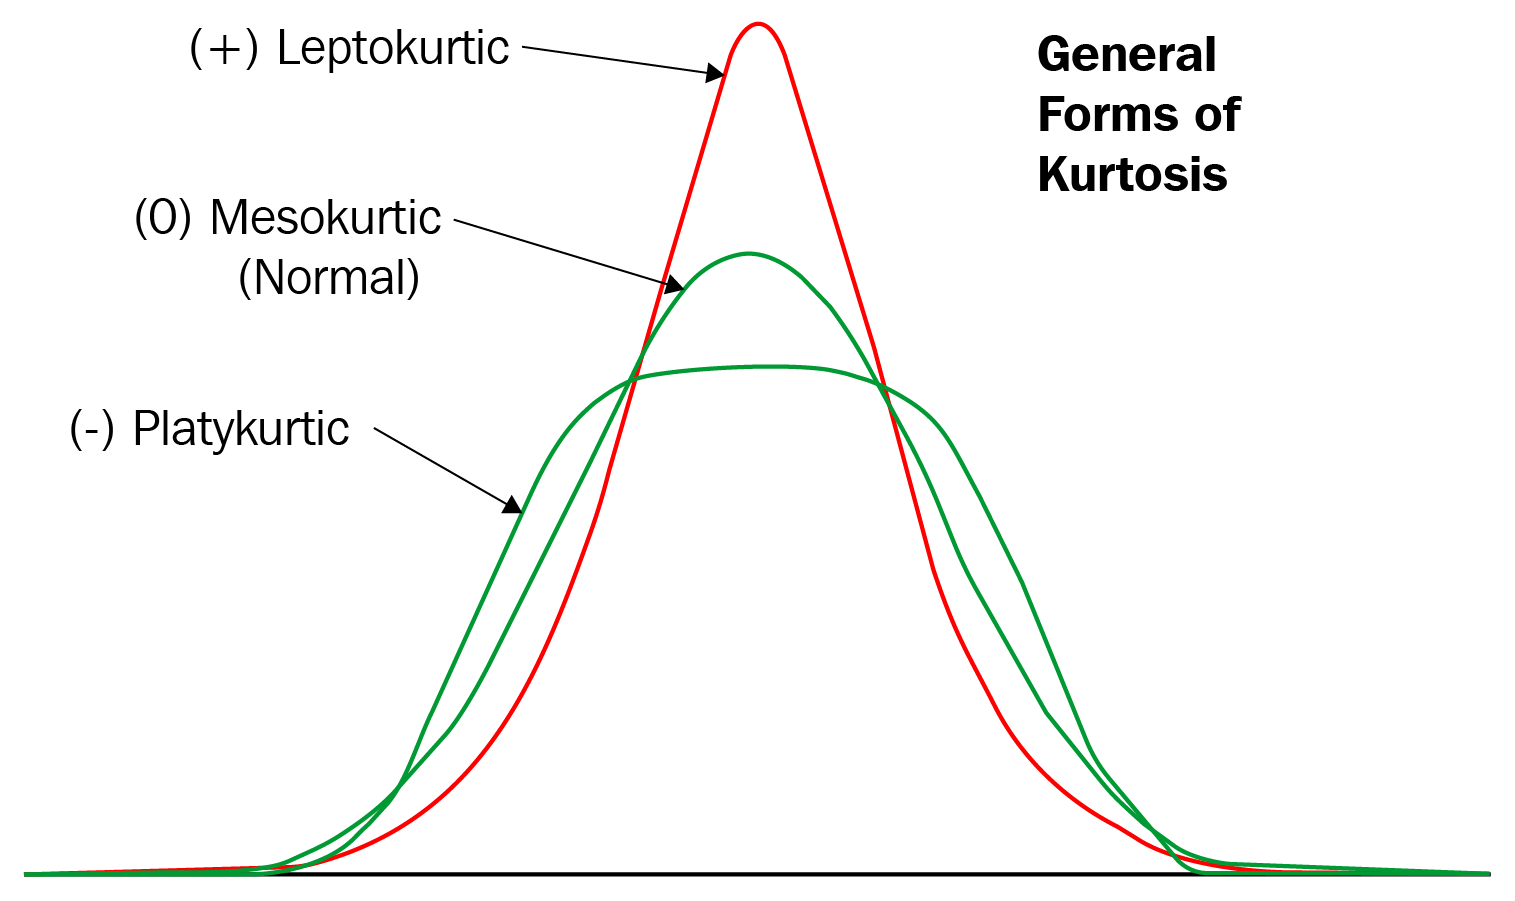

Tanto la baja como la alta curtosis indica que hay que investigar más los datos. Por otro lado, mientras más alta es la curtosis, mayor la cantidad de outliers.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


mu, sigma = 0, 1
normal_0_1 = np.random.normal(mu, sigma, 10000)

t_student = np.random.standard_t(4, 10000)

sns.distplot(t_student)
sns.distplot(normal_0_1)
plt.legend(["t-student", "N(0,1)"])

plt.show()

In [ ]:
df = pd.DataFrame({"N(0,1)": normal_0_1, "t-student": t_student})

In [ ]:
df.kurt()

In [ ]:
# solo una columna
df["t-student"].kurt()

In [ ]:
plt.boxplot(df, vert=False)
plt.grid()
plt.show()

Veamos qué pasa en nuestros datos:

In [ ]:
sns.distplot(datos_estandarizados["cantidad_certificados"])
plt.show()

In [ ]:
sns.distplot(datos_estandarizados["cantidad_personas"])
plt.show()

Ambas colas son muy largas, por lo que la curtosis será muy grande aunque en los boxplots no notáramos muchos. Esto significa que tampoco es un método que sirva para resolver el problema siempre. De hecho, es una cuestión de prueba y error qué método nos servirá mejor.

In [ ]:
datos_estandarizados.kurt()

### Remoción de outliers

La remoción de outliers puede ser necesaria en algunos casos, pero debe realizarse con precaución. La eliminación de outliers puede alterar la distribución y las propiedades estadísticas de los datos, y puede ser apropiada solo después de una evaluación cuidadosa de su naturaleza y origen.

Método basado en el rango intercuartílico (IQR):
* Calcular el IQR para la variable objetivo.
* Definir límites inferior y superior del rango aceptable utilizando un factor multiplicativo (por ejemplo, 1.5 o 3) multiplicado por el IQR.
* Eliminar cualquier valor que esté por debajo del límite inferior o por encima del límite superior.

In [ ]:
data = datos_fueraderango[mask]['cantidad_certificados']

data

In [ ]:
# Calcular el rango intercuartílico (IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

# Definir los límites inferior y superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Eliminar los outliers
data_sin_outliers = data[(data >= limite_inferior) & (data <= limite_superior)]
data_sin_outliers

Otra opción (dependiendo de la conveniencia) es la de remplazar los outliers por valores máximos y mínimos acotados a los cuartiles:

In [ ]:
# Eliminar los outliers
data_con_outliers_acotados = data.copy()
data_con_outliers_acotados[data > limite_superior] = limite_superior
data_con_outliers_acotados[data < limite_inferior] = limite_inferior
data_con_outliers_acotados

In [ ]:
plt.figure(figsize=(15, 5))
plt.boxplot(data, vert=False)
plt.grid()

plt.figure(figsize=(15, 5))
plt.boxplot(data_sin_outliers, vert=False)
plt.grid()

plt.figure(figsize=(15, 5))
plt.boxplot(data_con_outliers_acotados, vert=False)
plt.grid()

plt.show()

## Eliminar Duplicados

Eliminar duplicados es un paso esencial en el proceso de preprocesamiento de datos. Los datos duplicados pueden surgir en conjuntos de datos debido a diversas razones, como errores de entrada, fusiones incorrectas de datos o registros duplicados. La presencia de duplicados puede afectar negativamente el análisis y los modelos de datos, ya que pueden sesgar los resultados y disminuir la calidad de los análisis.

La eliminación de duplicados implica identificar y eliminar filas duplicadas en un conjunto de datos. Esto implica mantener solo una instancia de cada registro único y descartar las repeticiones. Al hacerlo, podemos obtener un conjunto de datos más limpio y preciso, sin información redundante.

Eliminar duplicados puede ser especialmente importante cuando se trabaja con grandes conjuntos de datos, ya que los duplicados pueden consumir recursos innecesarios y ralentizar los procesos de análisis y modelado.

En Python, la biblioteca pandas proporciona una función conveniente llamada `drop_duplicates()` que permite eliminar duplicados de un DataFrame. Esta función nos permite especificar las columnas en las que queremos buscar duplicados y decide cuáles de ellos eliminar en función de nuestros criterios.

Es importante tener en cuenta que la eliminación de duplicados debe realizarse de manera cuidadosa y considerada. Antes de eliminar duplicados, es esencial comprender los datos y el contexto en el que se recopilaron. En algunos casos, puede ser necesario conservar ciertos duplicados si representan información válida y relevante.

In [ ]:
# Datos de ejemplo
data = pd.DataFrame({'A': [1, 2, 2, 3, 3, 4, 5], 'B': ["Pepe", "Juan", "Maria", "Pepe", "Pepe", "maria", "Lorenzo"]})

display(data)

In [ ]:
data.drop_duplicates()

In [ ]:
# Eliminar duplicados considerando solo los datos de la columna 'B'
data.drop_duplicates(subset = 'B')

# Otros problemas

## Correlaciones espurias

Supongamos que tenemos audios de hablantes de dos clases: con cierta enfermedad (E) y los sujetos control (C). Queremos desarrollar un sistema para ayudar a diagnosticar la enfermedad en base a distintas tareas.

Tenemos también información sobre la recolección del audio: sample rate y codec.

In [ ]:
df = pd.DataFrame({
    "Sample rate": [11025, 48000, 11025, 44100, 44100, 48000],
    "Codec": ["PCM", "PCM", "PCM", "AAC LC", "PCM", "PCM"],
    "Cantidad de muestras": [16, 5, 2, 10, 1, 5],
}, index=["E", "E", "C", "C", "C", "C"])

In [ ]:
df.loc["E"]

In [ ]:
df.loc["C"]

#### ¿Qué problemas encontramos?

* Codec AAC LC solo para el grupo control.
* Sample rate en general alto para C pero bajo para E.

Estas correlaciones son espurias: probablemente no se conserven en datos futuros porque no están relacionadas lógicamente entre sí.

#### ¿Cómo nos enteramos de la presencia de correlaciones espurias?

* Conociendo los datos. Importancia de hacer EDA.
* Evaluando en otras bases de datos que no tengan los mismos sesgos.

## Dataset shift

Es el cambio en la distribución de los datos en distintos datasets. Cuando dividimos los datos asumimos que en deployment los datos van a tener la misma distribución que en nuestro dataset. Pero esto muchas veces no es así.

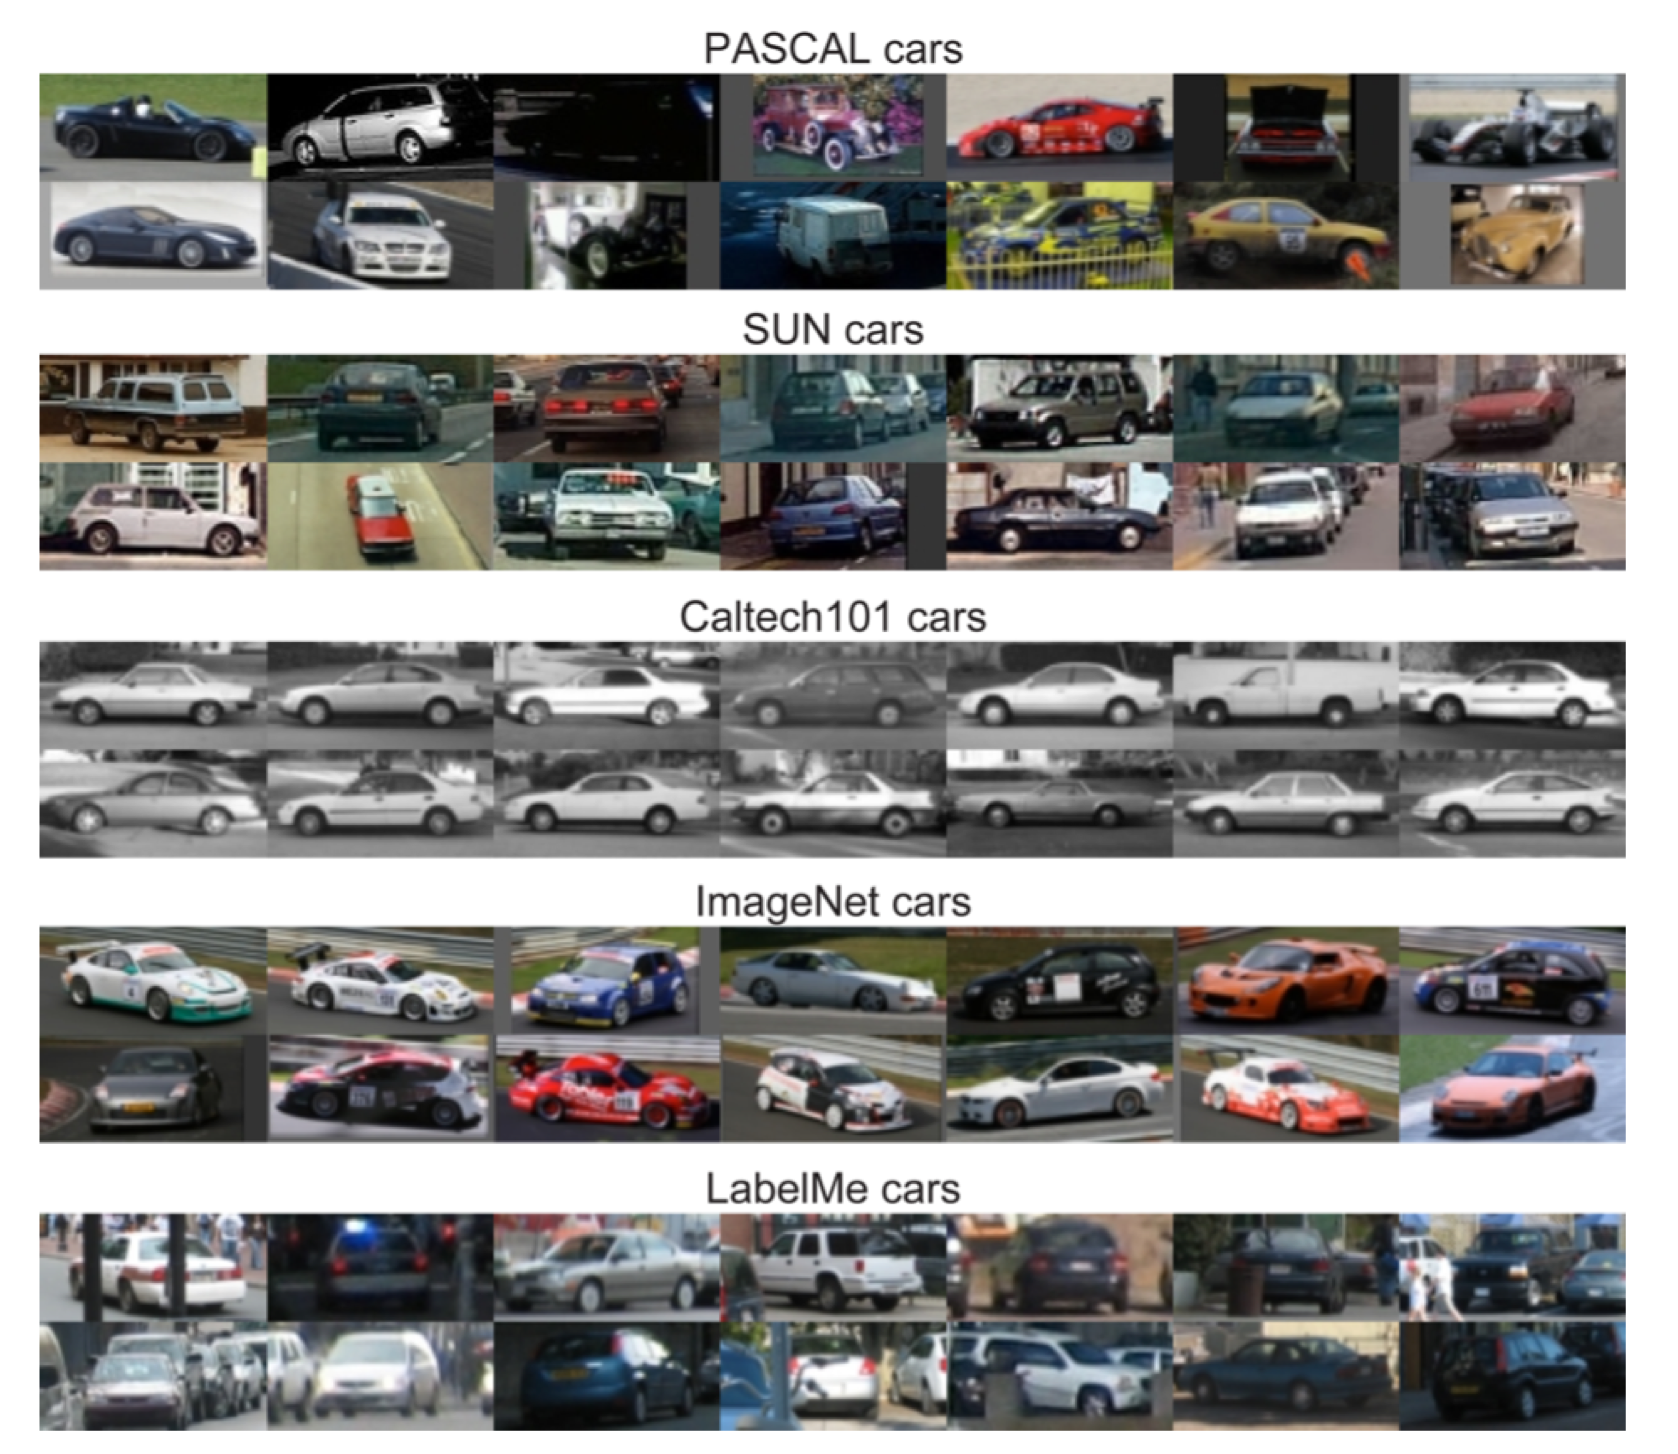

Si se entrena y evalúa en el mismo dataset vamoos a obtener resultados mejores que si evaluamos en otro. A veces resulta muy notoria la diferencia (por ej., ImageNet vs Caltech101).

Pensemos cómo aprende un humano. Si siempre vi autos ploteados como los de carreras, o más aún, siempre vi autos monoplaza de F1, ¿voy a poder distinguir a un auto urbano de un solo color como auto?

Lo ideal será tener varios dataset y dejar algunos exclusivamente para testear. O usar cross-validation (lo veremos más adelante) entre los datasets.